In [216]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [217]:
data = pd.DataFrame(pd.read_csv("E:\git\py-scrape-and-analyze-djinni\scrape_jobs\jobs.csv"))
data

,title,description,location,requirements,published,views,replies,english_level,years_of_experience
0,Str.Middle/Senior Python Developer,Looking for an experienced Python engineer who...,"Україна,Польща,Німеччина,Сполучені,Штати","SQL,PYTHON",9 січня 2024,5,1,Beginner/Elementary,5
1,Senior Python Developer_Competency Lead,Not specified,Україна,"PYTHON,AWS,REST,FAST,DJANGO",9 січня 2024,13,0,Upper-Intermediate,5
2,Middle Python Software Engineer (Prom.ua),Not specified,Україна,"PYTHON,KUBERNETES,CI/CD,CSS,POSTGRESQL,ELASTIC...",8 січня 2024,154,11,NaN,3
3,Python/Django developer,Not specified,Україна,"REST,REACT,JAVASCRIPT,CELERY,VUE.JS,POSTGRESQL...",9 січня 2024,348,139,Upper-Intermediate,1
4,Back-End Python (Django) Developer,We are seeking an experienced Python Developer...,Україна,"DEVELOPER,PYTHON,ANGULAR,CI/CD",8 січня 2024,108,38,Upper-Intermediate,5
...,...,...,...,...,...,...,...,...,...
188,Senior - Regular Python Developer ( EST workin...,Not specified,Україна,"PYTHON,AWS,AIRFLOW,PANDAS,SQL",23 листопада 2023,91,14,Upper-Intermediate,3
189,Tech Lead Data Engineer (Python),Not specified,"Чехія,Україна","PYTHON,LINUX,JAVASCRIPT,SQL,DJANGO",10 грудня 2023,70,16,Intermediate,3
190,Junior Python Developer,You should be able to pick some code and under...,"Велика,Британія,Сполучені,Штати","PYTHON,DJANGO",10 грудня 2023,472,121,Pre-Intermediate,2
191,Pyton Developer 4+ years exp,Responsibilities:,Україна,REST,23 жовтня 2023,44,7,NaN,5


In [218]:
data.dropna()[["views", "replies", "years_of_experience"]].describe()

,views,replies,years_of_experience
count,166.000000,166.000000,166.000000
mean,108.349398,23.915663,3.560241
std,125.499770,39.232703,1.359362
min,3.000000,0.000000,1.000000
25%,37.000000,4.000000,3.000000
50%,64.500000,10.000000,3.000000
75%,121.000000,24.750000,5.000000
max,729.000000,230.000000,5.000000


<Axes: >

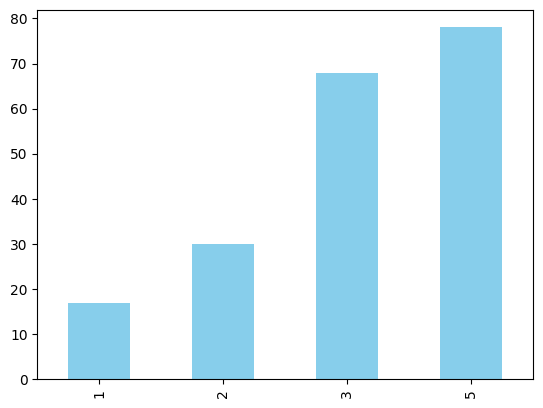

In [219]:
data["years_of_experience"].value_counts().sort_index().plot(kind='bar', color='skyblue')

<Axes: >

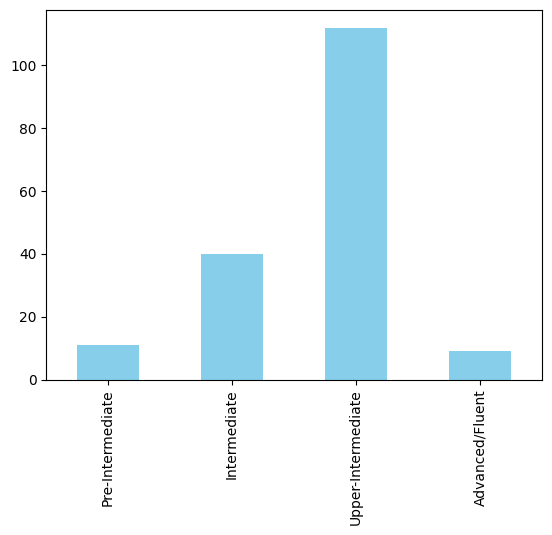

In [220]:
english_levels = ["Pre-Intermediate", "Intermediate", "Upper-Intermediate", "Advanced/Fluent"]

data["english_level"] = pd.Categorical(data["english_level"], categories=english_levels, ordered=True)
data["english_level"].value_counts().sort_index().plot(kind='bar', color='skyblue')

In [221]:
cleared_data = data.dropna()
locations = list({item for location in cleared_data["location"].str.split(",") for item in location})
job_count = [sum([location in loc_data for loc_data in cleared_data['location'].str.split(",")]) for location in locations]

tech_data = pd.DataFrame({'Locations': locations, "Jobs": job_count})

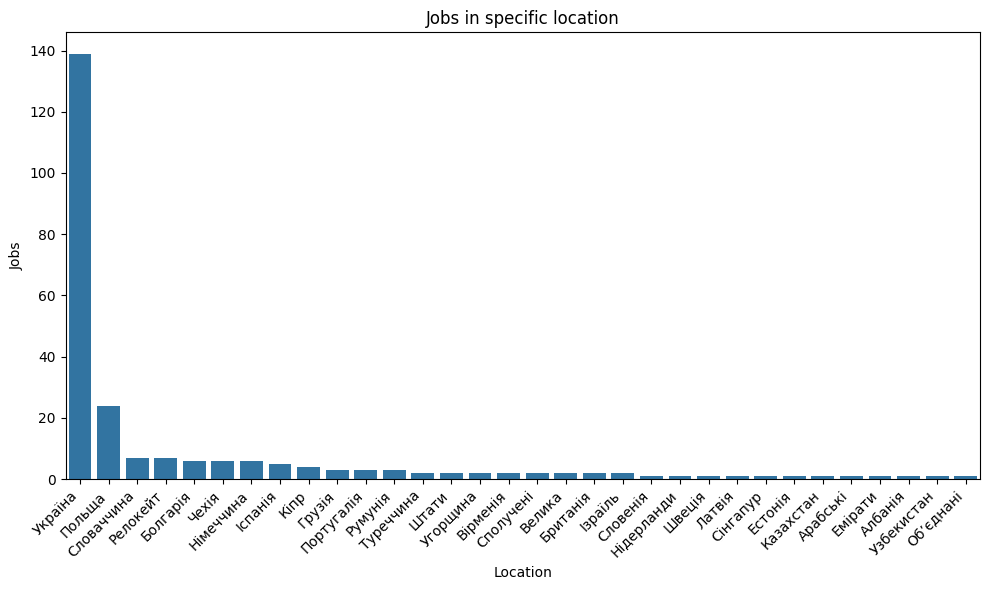

In [222]:
sorted_tech_data = tech_data.sort_values(by="Jobs", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Locations', y='Jobs', data=sorted_tech_data)
plt.title('Jobs in specific location')
plt.xlabel('Location')
plt.ylabel('Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [223]:
cleared_data = data.dropna()
technologies = list({item for tech in cleared_data["requirements"].str.split(",") for item in tech})
job_count = [sum([job in tech_list for tech_list in cleared_data['requirements'].str.split(",")]) for job in technologies]
tech_data = pd.DataFrame({'Technology': technologies, "Jobs": job_count})


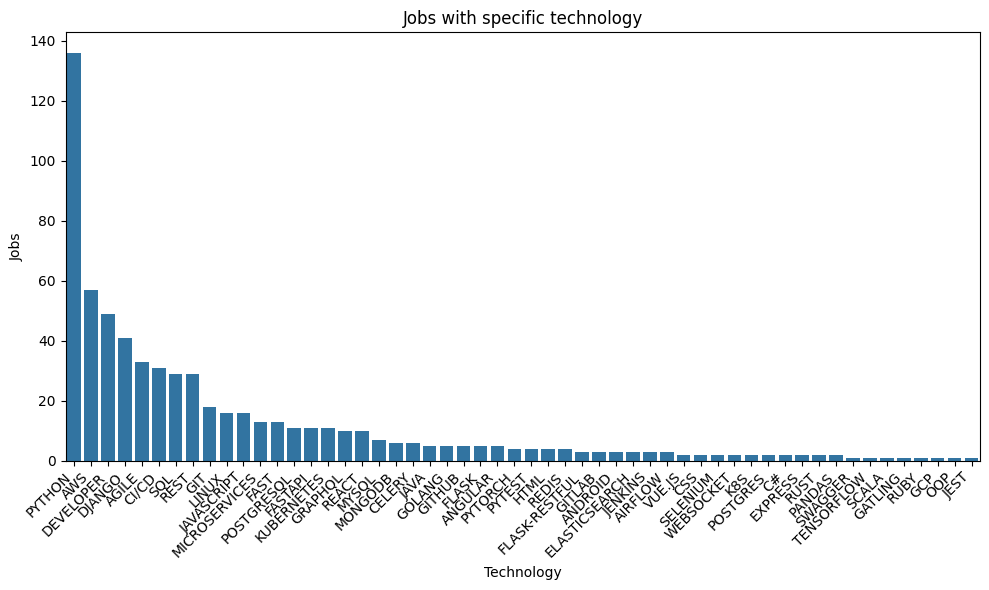

In [224]:
sorted_tech_data = tech_data.sort_values(by="Jobs", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Technology', y='Jobs', data=sorted_tech_data)
plt.title('Jobs with specific technology')
plt.xlabel('Technology')
plt.ylabel('Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()